# Train NN model on the FashionMNIST data

https://www.kaggle.com/zalando-research/fashionmnist

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

You may refer to this tutorial about the original Mnist:
https://towardsdatascience.com/handwritten-digit-mnist-pytorch-977b5338e627

Or any other tutorial you may find online:
https://www.kaggle.com/zalando-research/fashionmnist/code

In [34]:
import torch 
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt
import seaborn as sns
import torch.optim as optim
from sklearn.metrics import confusion_matrix
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [35]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

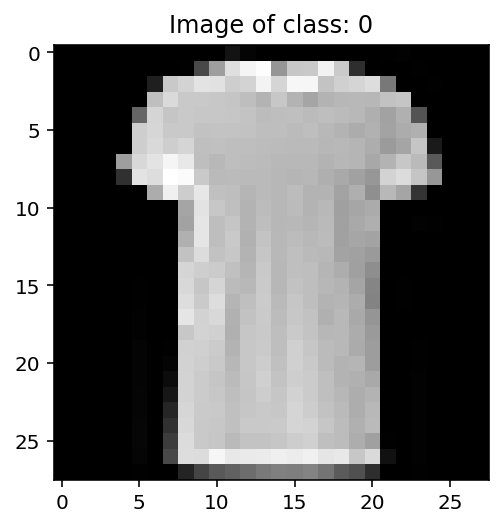

In [36]:
# Lest read a random image from the dataset and draw it
image, label = training_data[17]
plt.imshow(image[0], "gray")
plt.title(f"Image of class: {label}")
plt.show()

In [37]:
# Lets check image shape
image.shape

torch.Size([1, 28, 28])

In [38]:
# Lets see all the classes available
training_data.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

# Task 1:

Create a DataLoader objects for train and test

In [39]:
train_dataloader = DataLoader(training_data, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=1, shuffle=False)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

Feature batch shape: torch.Size([32, 1, 28, 28])
Labels batch shape: torch.Size([32])


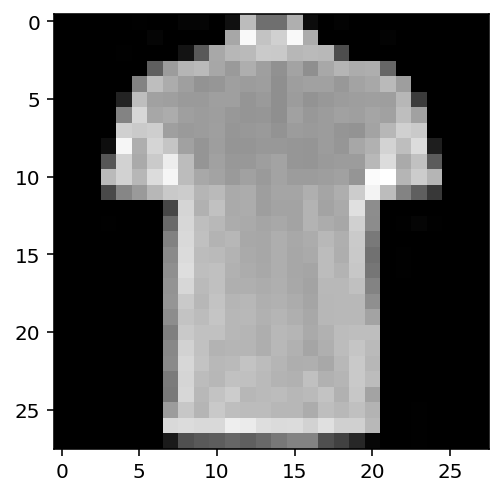

Label: 0


In [40]:
# Iterate through the DataLoader
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

# Task 2:

Create a Neural Network

In [41]:
model = nn.Sequential(nn.Linear(784, 256),
                      nn.ReLU(),
                      nn.Dropout(0.2),
                      nn.Linear(256, 128),
                      nn.ReLU(),
                      nn.Dropout(0.2),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Dropout(0.2),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim = 1)
                     )

# Task 3:

Specify loss and optimizer

In [42]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 30
print(len(training_data))

60000


# Task 3:

Train model using for loop

In [43]:
train_losses, test_losses, train_accuracy = [], [], []

preds = torch.tensor([])
true_vals = torch.tensor([])

for e in range(epochs):
    running_loss = 0
    for images, labels in train_dataloader:
        images = images.view(images.shape[0], -1)
    
        optimizer.zero_grad()
    
        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
    
        running_loss += loss.item()
    else:
        test_loss = 0
        accuracy = 0
    
    with torch.no_grad():
        model.eval()
      
        for images, labels in test_dataloader:
            true_vals = torch.cat((true_vals, labels), 0)
            images = images.view(1, 784)
            log_ps = model(images)
            test_loss += criterion(log_ps, labels)
        
            ps = torch.exp(log_ps)
            _, pred_label = torch.max(ps, dim = 1)
            preds = torch.cat((preds, pred_label), 0)
            top_p, top_class = ps.topk(1, dim = 1)
            equals = top_class == labels.view(*top_class.shape)
            accuracy += torch.mean(equals.type(torch.FloatTensor))
            if (e == 0):
                true_values = true_vals
                predictions = preds
                
    
    model.train()
    train_losses.append(running_loss/len(train_dataloader))
    test_losses.append(test_loss/len(test_dataloader))
    train_accuracy.append(accuracy/len(test_dataloader))
    
    print("Epoch: {}/{}..".format(e+1, epochs),
          "Training loss: {:.3f}..".format(running_loss/len(train_dataloader)),
          "Test loss: {:.3f}..".format(test_loss/len(test_dataloader)),
          "Test Accuracy: {:.3f}".format(accuracy/len(test_dataloader)))

Epoch: 1/30.. Training loss: 0.601.. Test loss: 0.449.. Test Accuracy: 0.840
Epoch: 2/30.. Training loss: 0.426.. Test loss: 0.413.. Test Accuracy: 0.847
Epoch: 3/30.. Training loss: 0.389.. Test loss: 0.379.. Test Accuracy: 0.860
Epoch: 4/30.. Training loss: 0.367.. Test loss: 0.373.. Test Accuracy: 0.868
Epoch: 5/30.. Training loss: 0.351.. Test loss: 0.366.. Test Accuracy: 0.871
Epoch: 6/30.. Training loss: 0.338.. Test loss: 0.368.. Test Accuracy: 0.864
Epoch: 7/30.. Training loss: 0.328.. Test loss: 0.360.. Test Accuracy: 0.867
Epoch: 8/30.. Training loss: 0.318.. Test loss: 0.352.. Test Accuracy: 0.873
Epoch: 9/30.. Training loss: 0.309.. Test loss: 0.350.. Test Accuracy: 0.874
Epoch: 10/30.. Training loss: 0.304.. Test loss: 0.340.. Test Accuracy: 0.880
Epoch: 11/30.. Training loss: 0.300.. Test loss: 0.345.. Test Accuracy: 0.876
Epoch: 12/30.. Training loss: 0.292.. Test loss: 0.321.. Test Accuracy: 0.886
Epoch: 13/30.. Training loss: 0.285.. Test loss: 0.333.. Test Accuracy: 0

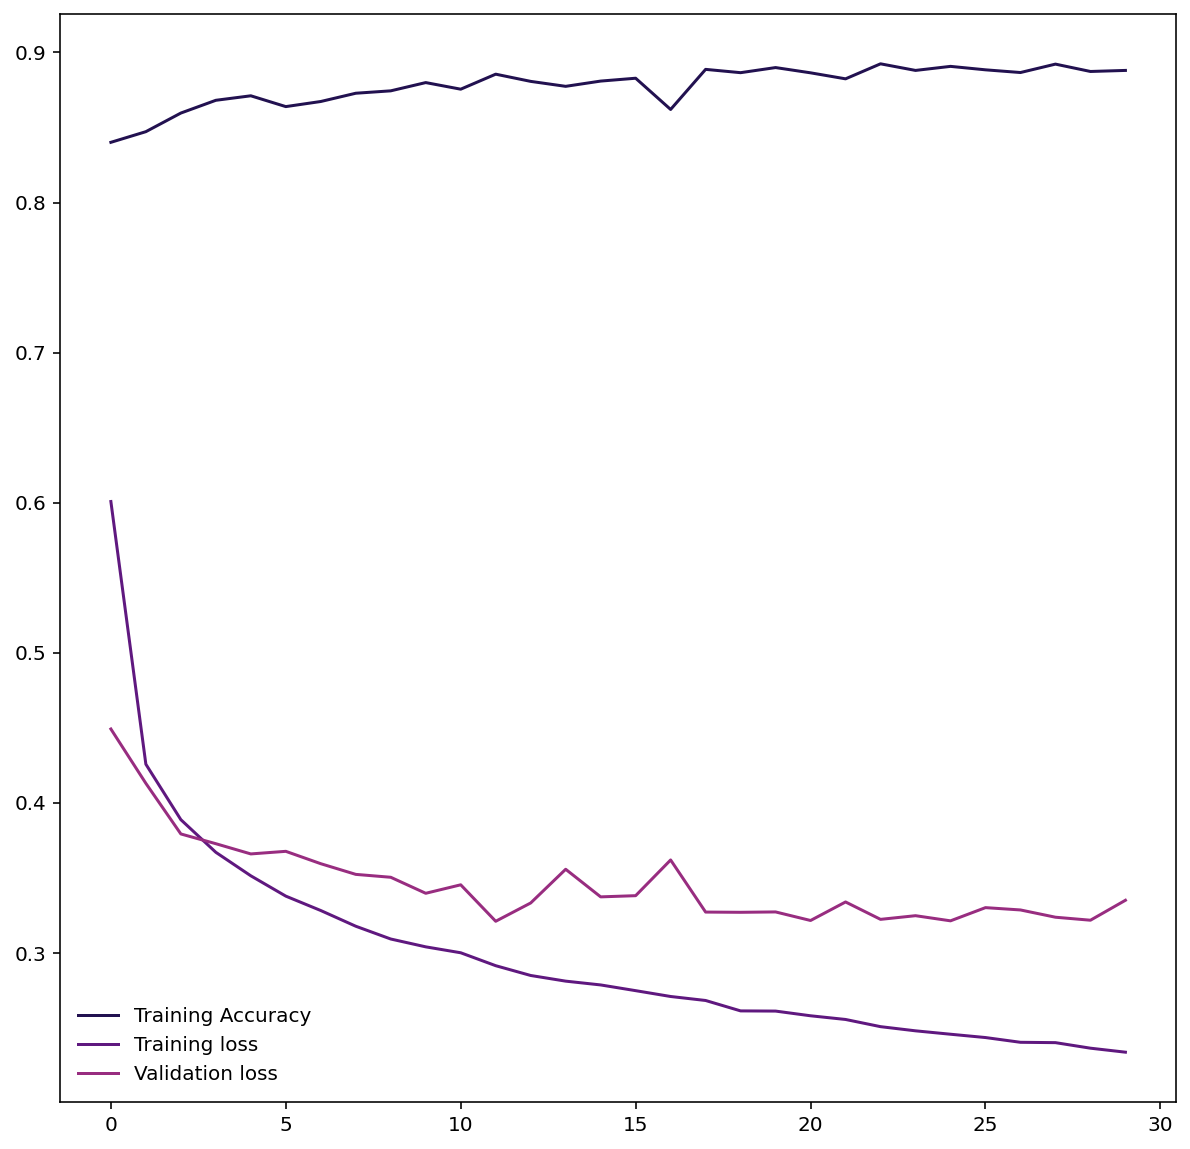

In [44]:
sns.set_palette("magma")
fig = plt.figure(figsize=(10, 10))
plt.plot(train_accuracy, label = "Training Accuracy")
plt.plot(train_losses, label = "Training loss")
plt.plot(test_losses, label = "Validation loss")
plt.legend(frameon = False)

# Task 4:

Report accuracy from train set, and test set independently

In [45]:
correct_count, all_count = 0, 0
for images,labels in train_dataloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with torch.no_grad():
        logps = model(img)

    
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1
    
print("Number Of Images Tested on Train set=", all_count)
print("\nModel Accuracy on Train set=", (correct_count/all_count))

correct_count, all_count = 0, 0
for images,labels in test_dataloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with torch.no_grad():
        logps = model(img)

    
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1    
    
print("\nNumber Of Images Tested on Test set=", all_count)
print("\nModel Accuracy on Test set=", (correct_count/all_count))

Number Of Images Tested on Train set= 60000

Model Accuracy on Train set= 0.9106

Number Of Images Tested on Test set= 10000

Model Accuracy on Test set= 0.8729


# Task 5:

Report confussion matrix for the test set

Expected format:
```
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])
```

Confusion Matrix: 

[[836   4  12  62   2   0  66   0  17   1]
 [  1 968   4  20   3   0   2   0   2   0]
 [ 13   4 820  10 104   1  40   0   8   0]
 [ 21  30  11 855  45   2  32   0   3   1]
 [  1   3 167  25 734   0  67   0   3   0]
 [  0   0   0   0   0 850   0  62   7  81]
 [213   2 159  54  74   0 474   0  24   0]
 [  0   0   0   0   0  14   0 938   0  48]
 [  5   0   6   2   4   3   6   5 969   0]
 [  0   0   0   0   0   0   0  42   1 957]]


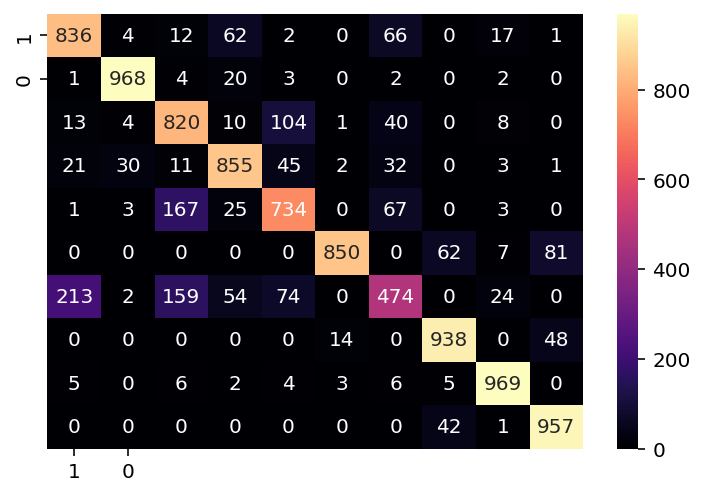

In [46]:
from sklearn.metrics import confusion_matrix

print("Confusion Matrix: \n")
confusion = confusion_matrix(true_values, predictions)
print(confusion)

sns.heatmap(confusion, annot=True, fmt="d", yticklabels=[1, 0], xticklabels=[1, 0], cmap="magma")
plt.show()

In [47]:
def view_classify(img, ps):
    
    ps = ps.data.numpy().squeeze()
    
    sns.set_palette("magma")
    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(['T-shirt/top',
                        'Trouser',
                        'Pullover',
                        'Dress',
                        'Coat',
                        'Sandal',
                        'Shirt',
                        'Sneaker',
                        'Bag',
                        'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

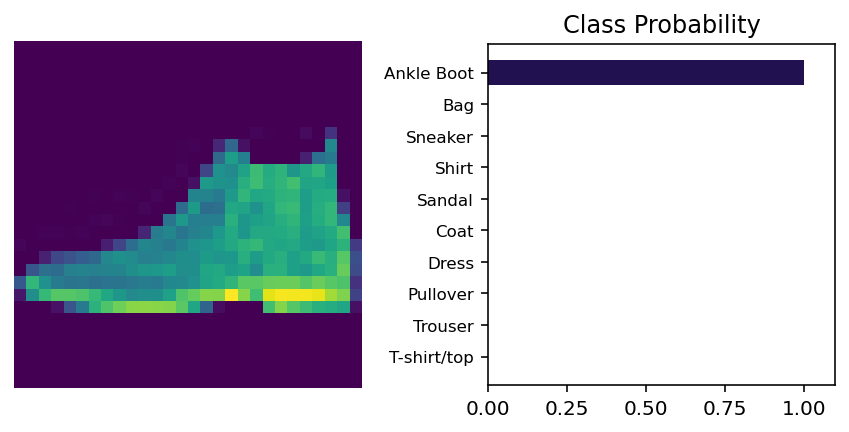

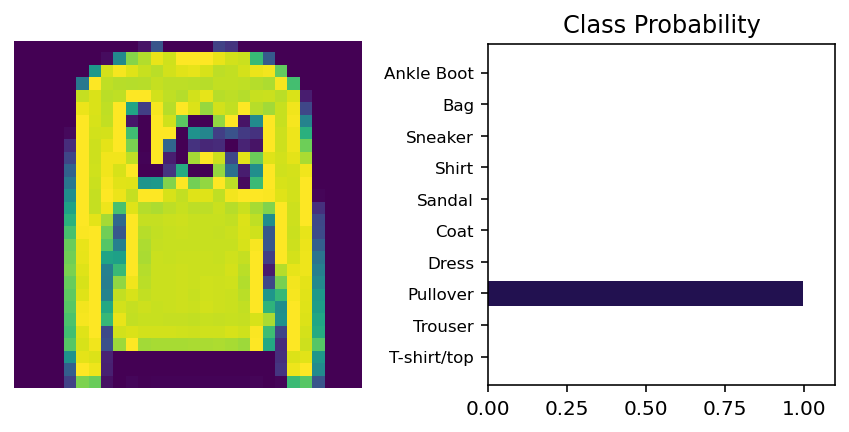

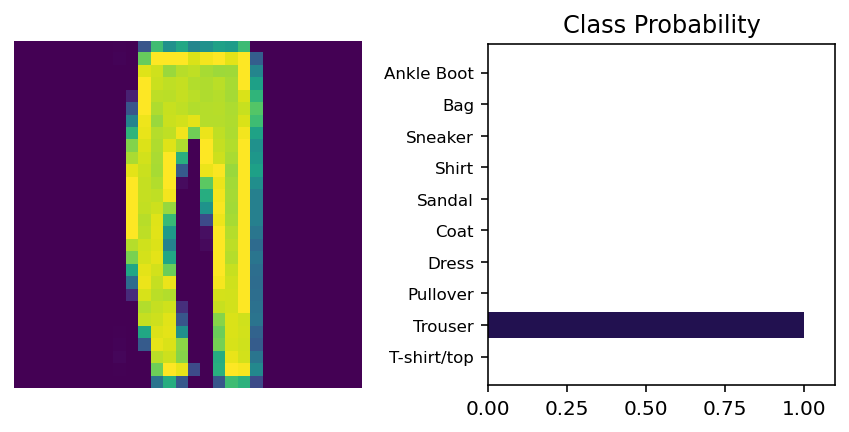

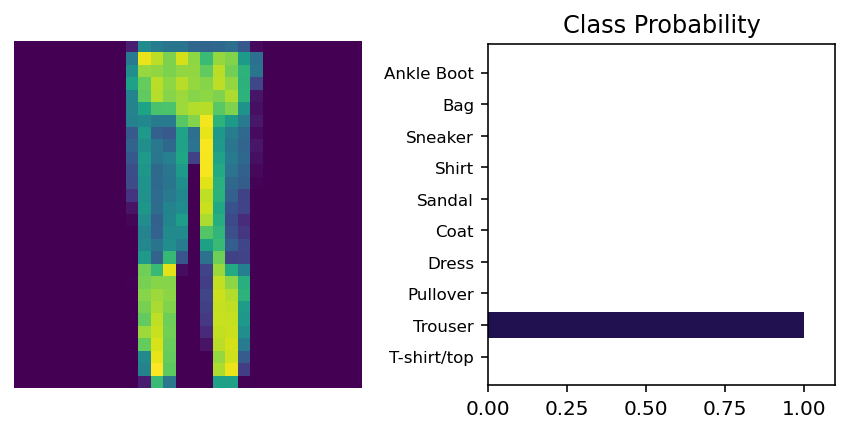

In [48]:
dataiter=iter(test_dataloader)

for i in range(4):
    images, labels = dataiter.next()
    img = images[0]
    img = img.resize_(1, 784)
    ps = torch.exp(model(img))

    view_classify(img, ps)

# Task 6 (optional):

Train LogisticRegression and DecisionTree models on the same data
Compare their performance to the NN

In [49]:
from sklearn.tree import DecisionTreeClassifier

train = training_data.data.numpy()
train = train.reshape(-1, 784)

train_labels = training_data.targets.numpy()

test = test_data.data.numpy()
test = test.reshape(-1, 784)
test_labels = test_data.targets.numpy()

dt = DecisionTreeClassifier()
dt.fit(train, train_labels)

predicts = dt.predict(test)
accuracy = (predicts == test_labels).sum() / len(predicts)
print("Decision Tree Accuracy ", (accuracy * 100))

Decision Tree Accuracy  79.03


In [50]:
from sklearn.linear_model import LogisticRegression

train = training_data.data.numpy()
train = train.reshape(-1, 784)

train_labels = training_data.targets.numpy()

test = test_data.data.numpy()
test = test.reshape(-1, 784)
test_labels = test_data.targets.numpy()

#tried to change max_iter to 10000, but it still asks to increase the number of iterations, so I left it be
lr = LogisticRegression()
lr.fit(train, train_labels)
predicts = lr.predict(test)
accuracy = (predicts == test_labels).sum() / len(predicts)
print("Logistic Regression Accuracy ", (accuracy * 100))

Logistic Regression Accuracy  84.11999999999999


C:\Users\Teet\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
